# Sprint 4.1
Consta dels següents exercicis:


## Exercici 1
Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

Crea almenys una visualització per:

- Una variable categòrica (Districte o Barri)
- Una variable numèrica (Preu)
- Una variable numèrica i una categòrica (Districte i Preu)
- Dues variables numèriques (Any o Trimestre i Preu)
- Tres variables (Barri o Districte, Trimestre i Preu)

## Exercici 2
Exporta els gràfics com imatges o com HTML.

## Exercici 3
Proposa alguna visualització que creguis que pot resultar interessant.

<font size="4"> Començarem analitzant i netejant el dataset. Ja avancem que acabarem dividint-lo en dos, i traballarem amb tots dos. </font>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

rent_bcn = pd.read_csv(r'C:\Users\WotanJr\Desktop\Data Science - IT Academy\Sprint 4/preu lloguer per trimestre i barri.csv', delimiter=',')

rent_bcn.head(10)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
5,2021,1,2,Eixample,6,la Sagrada Família,Lloguer mitjà mensual (Euros/mes),887.1
6,2021,1,2,Eixample,7,la Dreta de l'Eixample,Lloguer mitjà mensual (Euros/mes),1176.7
7,2021,1,2,Eixample,8,l'Antiga Esquerra de l'Eixample,Lloguer mitjà mensual (Euros/mes),1040.2
8,2021,1,2,Eixample,9,la Nova Esquerra de l'Eixample,Lloguer mitjà mensual (Euros/mes),964.0
9,2021,1,2,Eixample,10,Sant Antoni,Lloguer mitjà mensual (Euros/mes),898.7


In [2]:
rent_bcn.columns

Index(['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri',
       'Nom_Barri', 'Lloguer_mitja', 'Preu'],
      dtype='object')

In [3]:
rent_bcn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


In [4]:
rent_bcn.shape

(584, 8)

In [5]:
rent_bcn.isna().sum()

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

Això resulta una mica enganyós, quan fem una exploració de l'arxiu amb Excel veiem que hi han celes del preu que no estan buides, però contenen '--'. De manera que no hi han dades però això no es mostra en el metode isna.  
A continuació, primer els comptarem i després els mostrarem.

In [6]:
(rent_bcn['Preu'] == '--').sum()

44

In [7]:
print(rent_bcn[rent_bcn['Preu'] == '--'].sort_values(by = 'Nom_Barri'))

      Any  Trimestre  Codi_Districte   Nom_Districte  Codi_Barri  \
130  2021          1               9     Sant Andreu          58   
349  2021          3               9     Sant Andreu          58   
57   2021          1               9     Sant Andreu          58   
422  2021          3               9     Sant Andreu          58   
265  2021          2               8      Nou Barris          47   
411  2021          3               8      Nou Barris          47   
192  2021          2               8      Nou Barris          47   
119  2021          1               8      Nou Barris          47   
338  2021          3               8      Nou Barris          47   
46   2021          1               8      Nou Barris          47   
557  2021          4               8      Nou Barris          47   
484  2021          4               8      Nou Barris          47   
126  2021          1               8      Nou Barris          54   
491  2021          4               8      Nou Ba

Veiem que hi han barris dels quals no tenim els preus disponibles. Aquests són:
- la Marina del Prat Vermell (Sants-Montjuïc).
- la Clota (Horta-Guinardó)
- Vallbona (Nou Barris)
- Torre Baró (Nou Barris)
- Can Peguera (Nou Barris).  
De Baró de Viver (Sant Andreu) tenim disponibles els valors dels trimestres parells. Assimilarem els preus pels trimestres senars.

Hi ha un problema amb la columna preu, i és que aquest nombre no està interpretat com un float. Això probablement és degut als punts dels decimals i a les cel·les de la columna Preu que contenen -- . Substituirem els caracters -- per Nan's i ho tansformem amb el metode astype:

In [8]:
import numpy as np

rent_bcn = rent_bcn.replace({ "--": np.nan })

In [9]:
(rent_bcn['Preu'] == '--').sum()

0

In [10]:
rent_bcn['Preu'] = rent_bcn['Preu'].astype("float")

In [11]:
rent_bcn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    int64  
 1   Trimestre       584 non-null    int64  
 2   Codi_Districte  584 non-null    int64  
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    int64  
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 36.6+ KB


En aquest exercici té sentit separar el dataframe en dues parts, ja que disposem de dos tipus de lloguers mitjans, un per mes i un altre per mes i metre quadrat. Els separarem:

In [12]:
rent_bcn_month = rent_bcn.loc[rent_bcn['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']
rent_bcn_month

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
506,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà mensual (Euros/mes),1205.3
507,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà mensual (Euros/mes),700.5
508,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà mensual (Euros/mes),977.8
509,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà mensual (Euros/mes),826.2


In [13]:
rent_bcn_month_m2 = rent_bcn.loc[rent_bcn['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)']
rent_bcn_month_m2

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
73,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.8
74,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà per superfície (Euros/m2 mes),12.3
75,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),15.5
76,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà per superfície (Euros/m2 mes),13.3
77,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà per superfície (Euros/m2 mes),12.9
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


In [14]:
rent_bcn_month.isna().sum()

Any                0
Trimestre          0
Codi_Districte     0
Nom_Districte      0
Codi_Barri         0
Nom_Barri          0
Lloguer_mitja      0
Preu              22
dtype: int64

In [15]:
rent_bcn_month_m2.isna().sum()

Any                0
Trimestre          0
Codi_Districte     0
Nom_Districte      0
Codi_Barri         0
Nom_Barri          0
Lloguer_mitja      0
Preu              22
dtype: int64

No utilitzarem el dropna. Omplirem els preus que manquen a tots dos dataframes. De Baró de Viver (Sant Andreu) tenim alguns valors disponibles (trimestres senars), utilitzarem la mitja d'aquests.

Pel que fa als barris dels quals no tenim els preus disponibles que són:
- la Marina del Prat Vermell (Sants-Montjuïc).
- la Clota (Horta-Guinardó)
- Vallbona (Nou Barris)
- Torre Baró (Nou Barris)
- Can Peguera (Nou Barris).  

El que farem és assimilar els preus a la mitja dels seus respectius districtes. A continuació mostrem com hem fet les mitjanes esmentades. I a la següent cel·la mostrem la imputació.

In [16]:
print(rent_bcn_month.loc[rent_bcn_month['Nom_Districte'] == 'Sants-Montjuïc', 'Preu'].mean())
print(rent_bcn_month.loc[rent_bcn_month['Nom_Districte'] == 'Horta-Guinardó', 'Preu'].mean())
print(rent_bcn_month.loc[rent_bcn_month['Nom_Districte'] == 'Nou Barris', 'Preu'].mean())
print(rent_bcn_month.loc[rent_bcn_month['Nom_Barri'] == 'Baró de Viver', 'Preu'].mean())

print(rent_bcn_month_m2.loc[rent_bcn_month_m2['Nom_Districte'] == 'Sants-Montjuïc', 'Preu'].mean())
print(rent_bcn_month_m2.loc[rent_bcn_month_m2['Nom_Districte'] == 'Horta-Guinardó', 'Preu'].mean())
print(rent_bcn_month_m2.loc[rent_bcn_month_m2['Nom_Districte'] == 'Nou Barris', 'Preu'].mean())
print(rent_bcn_month_m2.loc[rent_bcn_month_m2['Nom_Barri'] == 'Baró de Viver', 'Preu'].mean())

798.932142857143
765.0074999999999
664.2925000000001
532.1
12.678571428571427
11.9875
10.922499999999998
7.949999999999999


In [17]:
# IMPUTATION:
rent_bcn_month.loc[rent_bcn_month['Nom_Barri'] == 'la Marina del Prat Vermell', 'Preu'] = (rent_bcn_month.loc[rent_bcn_month['Nom_Districte'] == 'Sants-Montjuïc', 'Preu'].mean())
rent_bcn_month.loc[rent_bcn_month['Nom_Barri'] == 'la Clota', 'Preu'] = (rent_bcn_month.loc[rent_bcn_month['Nom_Districte'] == 'Horta-Guinardó', 'Preu'].mean())
rent_bcn_month.loc[rent_bcn_month['Nom_Barri'] == 'Vallbona', 'Preu'] = (rent_bcn_month.loc[rent_bcn_month['Nom_Districte'] == 'Nou Barris', 'Preu'].mean())
rent_bcn_month.loc[rent_bcn_month['Nom_Barri'] == 'Torre Baró', 'Preu'] = (rent_bcn_month.loc[rent_bcn_month['Nom_Districte'] == 'Nou Barris', 'Preu'].mean())
rent_bcn_month.loc[rent_bcn_month['Nom_Barri'] == 'Can Peguera', 'Preu'] = (rent_bcn_month.loc[rent_bcn_month['Nom_Districte'] == 'Nou Barris', 'Preu'].mean())
rent_bcn_month.loc[rent_bcn_month['Nom_Barri'] == 'Baró de Viver', 'Preu'] = (rent_bcn_month.loc[rent_bcn_month['Nom_Barri'] == 'Baró de Viver', 'Preu'].mean())

In [18]:
rent_bcn_month.isna().sum()

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

In [19]:
rent_bcn_month_m2.loc[rent_bcn_month_m2['Nom_Barri'] == 'la Marina del Prat Vermell', 'Preu'] = (rent_bcn_month_m2.loc[rent_bcn_month_m2['Nom_Districte'] == 'Sants-Montjuïc', 'Preu'].mean())
rent_bcn_month_m2.loc[rent_bcn_month_m2['Nom_Barri'] == 'la Clota', 'Preu'] = (rent_bcn_month_m2.loc[rent_bcn_month_m2['Nom_Districte'] == 'Horta-Guinardó', 'Preu'].mean())
rent_bcn_month_m2.loc[rent_bcn_month_m2['Nom_Barri'] == 'Vallbona', 'Preu'] = (rent_bcn_month_m2.loc[rent_bcn_month_m2['Nom_Districte'] == 'Nou Barris', 'Preu'].mean())
rent_bcn_month_m2.loc[rent_bcn_month_m2['Nom_Barri'] == 'Torre Baró', 'Preu'] = (rent_bcn_month_m2.loc[rent_bcn_month_m2['Nom_Districte'] == 'Nou Barris', 'Preu'].mean())
rent_bcn_month_m2.loc[rent_bcn_month_m2['Nom_Barri'] == 'Can Peguera', 'Preu'] = (rent_bcn_month_m2.loc[rent_bcn_month_m2['Nom_Districte'] == 'Nou Barris', 'Preu'].mean())
rent_bcn_month_m2.loc[rent_bcn_month_m2['Nom_Barri'] == 'Baró de Viver', 'Preu'] = (rent_bcn_month_m2.loc[rent_bcn_month_m2['Nom_Barri'] == 'Baró de Viver', 'Preu'].mean())

In [20]:
rent_bcn_month_m2.isna().sum()

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

In [21]:
rent_bcn_month

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
506,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà mensual (Euros/mes),1205.3
507,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà mensual (Euros/mes),700.5
508,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà mensual (Euros/mes),977.8
509,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà mensual (Euros/mes),826.2


In [22]:
rent_bcn_month.describe(include='all')

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
count,292.0,292.000000,292.000000,292,292.000000,292,292,292.000000
unique,NaN,NaN,NaN,10,NaN,73,1,NaN
top,NaN,NaN,NaN,Nou Barris,NaN,el Raval,Lloguer mitjà mensual (Euros/mes),NaN
freq,NaN,NaN,NaN,52,NaN,4,292,NaN
mean,2021.0,2.500000,6.246575,NaN,37.000000,NaN,NaN,858.293728
std,0.0,1.119953,2.793123,NaN,21.107481,NaN,NaN,218.617611
min,2021.0,1.000000,1.000000,NaN,1.000000,NaN,NaN,488.100000
25%,2021.0,1.750000,4.000000,NaN,19.000000,NaN,NaN,735.800000
50%,2021.0,2.500000,7.000000,NaN,37.000000,NaN,NaN,804.950000
75%,2021.0,3.250000,8.000000,NaN,55.000000,NaN,NaN,927.750000


In [23]:
rent_bcn_month_m2

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
73,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.8
74,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà per superfície (Euros/m2 mes),12.3
75,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),15.5
76,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà per superfície (Euros/m2 mes),13.3
77,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà per superfície (Euros/m2 mes),12.9
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


In [24]:
rent_bcn_month_m2.describe(include='all')

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
count,292.0,292.000000,292.000000,292,292.000000,292,292,292.000000
unique,NaN,NaN,NaN,10,NaN,73,1,NaN
top,NaN,NaN,NaN,Nou Barris,NaN,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),NaN
freq,NaN,NaN,NaN,52,NaN,4,292,NaN
mean,2021.0,2.500000,6.246575,NaN,37.000000,NaN,NaN,12.603542
std,0.0,1.119953,2.793123,NaN,21.107481,NaN,NaN,1.717216
min,2021.0,1.000000,1.000000,NaN,1.000000,NaN,NaN,7.950000
25%,2021.0,1.750000,4.000000,NaN,19.000000,NaN,NaN,11.500000
50%,2021.0,2.500000,7.000000,NaN,37.000000,NaN,NaN,12.689286
75%,2021.0,3.250000,8.000000,NaN,55.000000,NaN,NaN,13.525000


<font size="4"> A partir d'aquí començarem a fer les següents visualitzacions: </font>

- Una variable categòrica (Districte o Barri)
- Una variable numèrica (Preu)
- Una variable numèrica i una categòrica (Districte i Preu)
- Dues variables numèriques (Any o Trimestre i Preu)
- Tres variables (Barri o Districte, Trimestre i Preu)

<font size="4"> A cada gràfica inclourem el codi per exportar els gráfics i guardar-los com a arxiu png a la mateixa carpeta que l'arxiu, tal com demana l'exercici 2. </font>

### Una variable categòrica (Districte o Barri)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

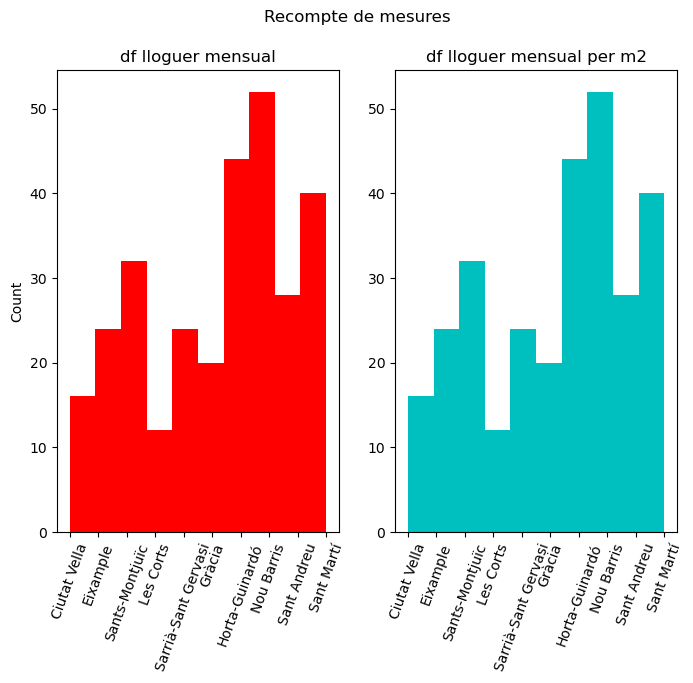

In [26]:
plt.figure(figsize=(8,6))

plt.subplot(1, 2, 1)
plt.hist(rent_bcn_month['Nom_Districte'], color = 'r')
plt.xticks(rotation = 70)
plt.ylabel("Count")
plt.title("df lloguer mensual")

plt.subplot(1, 2, 2)
plt.hist(rent_bcn_month_m2['Nom_Districte'], color = 'c')
plt.xticks(rotation = 70)
plt.title("df lloguer mensual per m2")

plt.suptitle("Recompte de mesures")
plt.savefig('categorical_Districte.png', bbox_inches='tight')  # bbox_inches cal incloure-ho pq sino la grafica surt tallada per baix

plt.show()

Hem posat en dues gráfiques, una al costat de l'altra, el recompte de dades de lloguer per cada districte. D'entrada s'observa que el recompte és el mateix per a tots dos dataframes. Aixó és degut a que quan els hem separat, cada dada de lloguer mensual tenia el seu equivalent de lloguer mensual per metre quadrat.  
A la gràfica de l'esquerra s'observa el dataframe de lloguer mensual i a la dreta el de lloguer mensual per m2.  
Veiem que el valor més alt correspon a Nou Barris amb 52 mesures. Això és degut (com veurem a l'exercici 3) a que és el districte amb més barris: 13, amb 4 mesures cada un. El districte que en té menys és Les Corts per tenir 3 barris (12 mesures a cada df).

### Una variable numèrica (Preu)

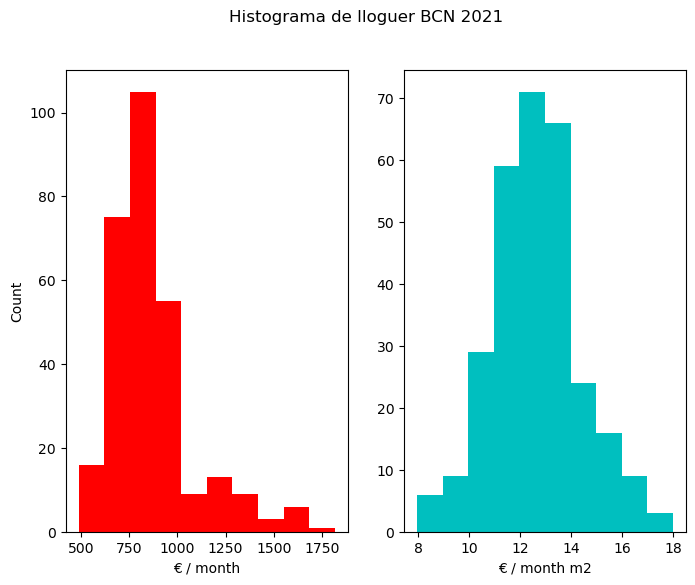

In [27]:
plt.figure(figsize=(8,6))

plt.subplot(1, 2, 1)
plt.hist(rent_bcn_month['Preu'], color = 'r')
plt.ylabel("Count")
# plt.title("mensual")
plt.xlabel('€ / month')

plt.subplot(1, 2, 2)
plt.hist(rent_bcn_month_m2['Preu'], color = 'c')
# plt.title("mensual per m2")
plt.xlabel('€ / month m2')

plt.suptitle("Histograma de lloguer BCN 2021")
plt.savefig('numerical_Lloguer.png')

plt.show()

A la gràfica de l'esquerra podem veure com la majoria de lloguers es troben al voltant dels 800 - 900 euros per mes. Podem observar que la distribució de lloguers d'aquesta gráfica presenta asimetria, el que es coneix skewness positiva, és a dir, que la "cua" de valors va cap a la dreta, mentra que la majoria de valor es troben més a l'esquerra.

Per altra banda a la gràfica de la dreta (lloguer per mes i m2), la majoria de lloguers es troben entre 12 i 14 euros per mes i m2. En aquest cas veiem una distribució bastant simetrica de les dades, podria ser normal o gaussiana.

### Una variable numèrica i una categòrica (Districte i Preu)

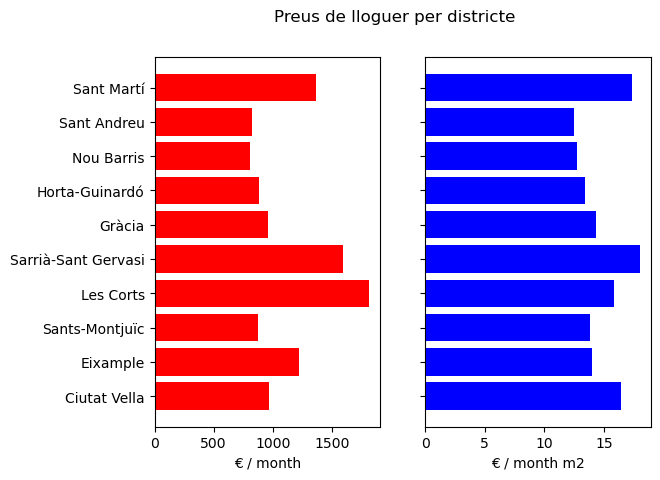

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)
fig.suptitle('Preus de lloguer per districte')

ax1.barh(rent_bcn_month['Nom_Districte'],rent_bcn_month['Preu'], color = "r")
ax1.set_xlabel('€ / month')

ax2.barh(rent_bcn_month_m2['Nom_Districte'],rent_bcn_month_m2['Preu'], color = "b")
ax2.set_xlabel('€ / month m2')

plt.savefig('numerical_categorical.png', bbox_inches='tight')
plt.show()

Ara amb una variable categorica (districte) i una numerica (Preu de lloguer) podem començar a treure algunes conclusions:  
- Veiem que Les Corts té el lloguer mensual més alt, però no per metre quadrat. Probablement per la grandària de les vivendes.
- Inversament, Ciutat Vella té un lloguer mensual dels més baixos, però dels més alts per m2, aquest districte és conegut pel petit tamany de les vivendes. Una cosa semblant passa amb Sants-Montjuïc.
- El lloguer més alt per mes i m2 correspont a Sarrià-Sant Gervasi.
- El lloguer mensual més baix és el de Nou Barris.

### Dues variables numèriques (Any o Trimestre i Preu)

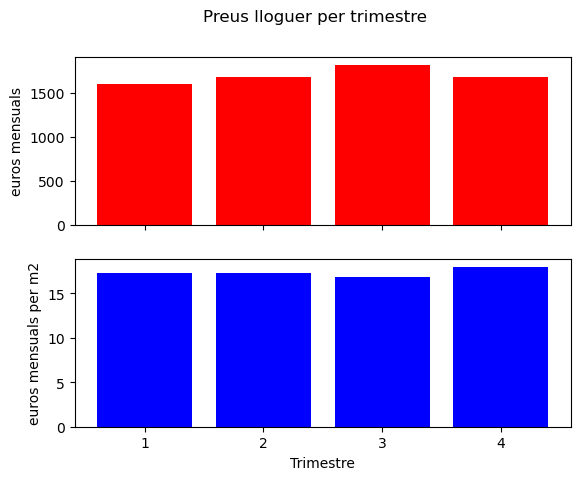

In [29]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
fig.suptitle('Preus lloguer per trimestre')

ax1.bar(rent_bcn_month['Trimestre'],rent_bcn_month['Preu'], color = "r")
ax2.set_xlabel('Trimestre')
ax1.set_ylabel('euros mensuals')

ax2.bar(rent_bcn_month_m2['Trimestre'],rent_bcn_month_m2['Preu'], color = "b")
ax2.set_ylabel('euros mensuals per m2')

plt.xticks([1, 2, 3, 4])

plt.show()

Amb el diagrama de barres de lloguer per trimestre no es poden extreure gaires conclusions. Farem el mateix gràfic amb un boxplot:

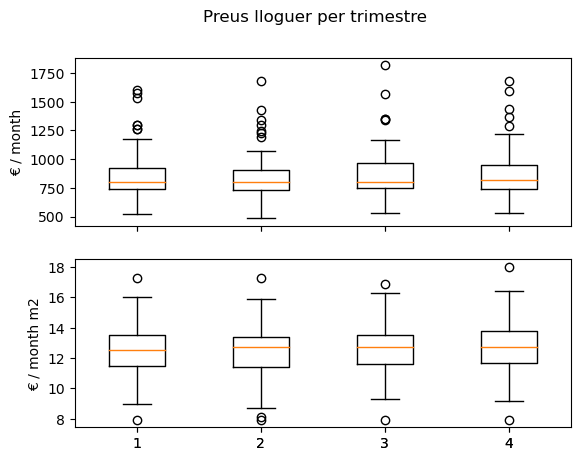

In [30]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.suptitle('Preus lloguer per trimestre')

y = rent_bcn_month.loc[rent_bcn_month['Trimestre'] == 1, 'Preu'], rent_bcn_month.loc[rent_bcn_month['Trimestre'] == 2, 'Preu'], rent_bcn_month.loc[rent_bcn_month['Trimestre'] == 3, 'Preu'], rent_bcn_month.loc[rent_bcn_month['Trimestre'] == 4, 'Preu']
ax1.boxplot(y)
ax1.set_ylabel('€ / month')

k = rent_bcn_month_m2.loc[rent_bcn_month_m2['Trimestre'] == 1, 'Preu'], rent_bcn_month_m2.loc[rent_bcn_month_m2['Trimestre'] == 2, 'Preu'], rent_bcn_month_m2.loc[rent_bcn_month_m2['Trimestre'] == 3, 'Preu'], rent_bcn_month_m2.loc[rent_bcn_month_m2['Trimestre'] == 4, 'Preu']
ax2.boxplot(k)
ax2.set_ylabel('€ / month m2')

plt.savefig('two_numerical.png')
plt.show()

Ara que tenim un gràfic per veure la distribució de lloguers al llarg de l'any, es pot apreciar al lloguer mensual un augment de outliers i de percentils alts al tercer trimestre, la qual cosa podria ser indicatiu de augments de preu per la temporada d'estiu. També s'aprecia una mica un augment de percentils alts al quart trimestre (potser degut al període de Nadal i any nou). Les mitjanes però, no es mouen gaire durant l'any.

### Tres variables (Barri o Districte, Trimestre i Preu)

Per fer aquest exercici utilitzarem la llibreria seaborn, ja que aquesta resulta bastant més simple d'utilitzar.

Realitzarem boxplots al llarg d'un eix x de districtes que estaran desagregats per trimestres. Ho farem tant pels lloguers mensuals així com pels lloguers mensuals per m2.

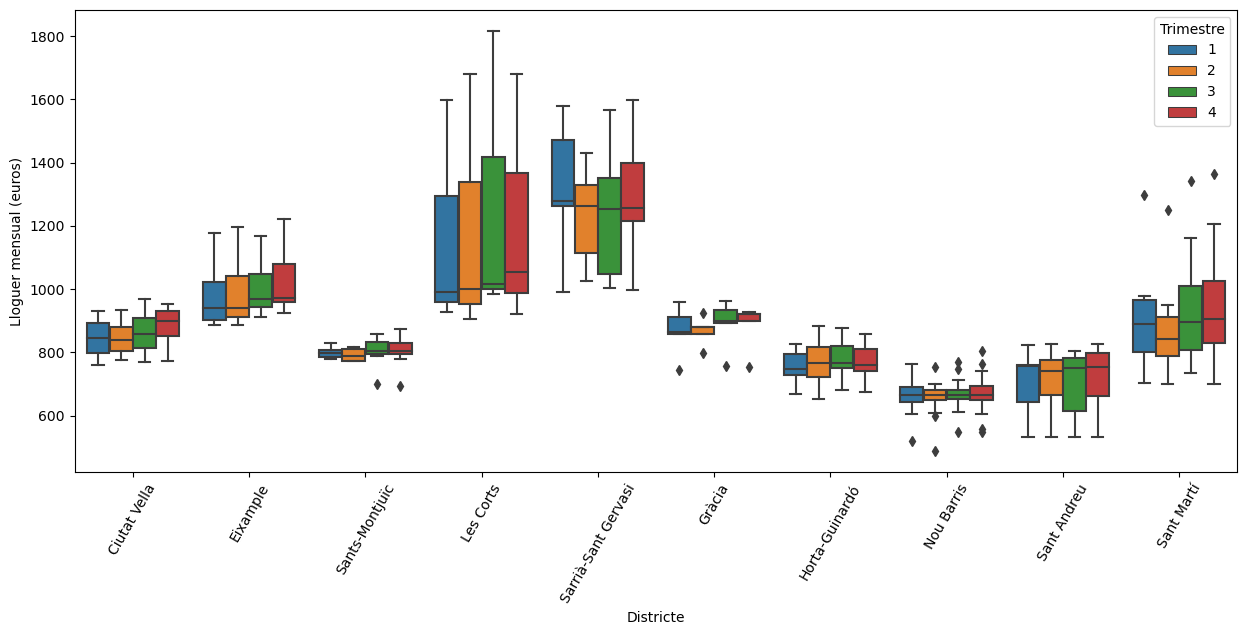

In [31]:
import seaborn as sns

plt.figure(figsize=(15,6))

sns.boxplot(data = rent_bcn_month, x = rent_bcn_month['Nom_Districte'], 
            y = rent_bcn_month['Preu'], hue = rent_bcn_month['Trimestre'])

plt.ylabel('Lloguer mensual (euros)')
plt.xlabel('Districte')
plt.xticks(rotation = 60)

plt.savefig('tres_variables_month.png', bbox_inches='tight')
plt.show()

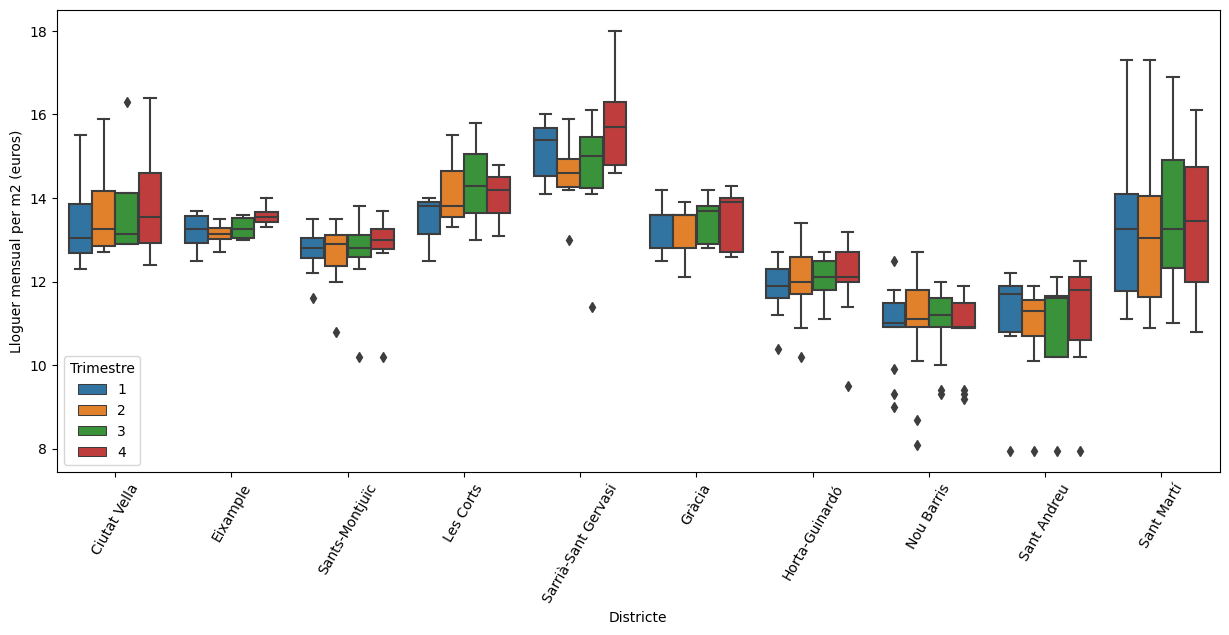

In [32]:
import seaborn as sns

plt.figure(figsize=(15,6))

sns.boxplot(data = rent_bcn_month_m2, x = rent_bcn_month_m2['Nom_Districte'], y = rent_bcn_month_m2['Preu'], 
            hue = rent_bcn_month_m2['Trimestre'])

plt.ylabel('Lloguer mensual per m2 (euros)')
plt.xlabel('Districte')
plt.xticks(rotation = 60)
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Trimestre') # aixo es fa per si la llegenda trepitja la grafica

plt.savefig('tres_variables_month_m2.png', bbox_inches='tight')
plt.show()

En el primer gràfic (lloguers mensuals) es pot observar:

- Hi ha una tendència a l'alça en els lloguers mensuals dels trimestres tres i quatre en molts dels districtes, exceptuant Sarrià-Sant Gervasi. Això encaixa amb el que hem comentat abans de que hi han augments de lloguers a les etapes estivals a la ciutat.
- S'observa també en aquesta gràfica de lloguer mensual bastants outliers per sota durant tot l'any als districtes de Gràcia i Nou Barris que podrien ser deguts a lloguers de renda antiga.
- En el cas de Sant Martí els outliers estan molt per sobre, molt probablement pels preus a la Vila Olímpica. Això explicaria que al gràfic de lloguer per mes i m2 el boxplot és més ampli que a cap altre districte, per la dispersió de preus.
- Al gràfic de lloguer per mes i m2 s'observen molts outliers per baix als districtes de Sant Andreu, Nou Barris, Horta-Guinardó i Sants-Montjuïc. Aquests districtes són dels que tenen més barris (veure Exercici 3). Sense ánims de fer perfils, això podria estar relacionat amb la renda disponible, però ara com ara no tenim dades per confirma això.

## Exercici 3

Proposa alguna visualització que creguis que pot resultar interessant.

Farem una visualització del nombre de barris per cada districte amb un pie chart. El farem amb el precentatge de barris per districte, però també inclourem el nombre de barris a cada districte al costat del percentatge a cada wedge. Per fer això últim hem hagut de dividir per 4 el value_counts de la columna Nom_Districte perque hi han 4 mesures per cada barri.

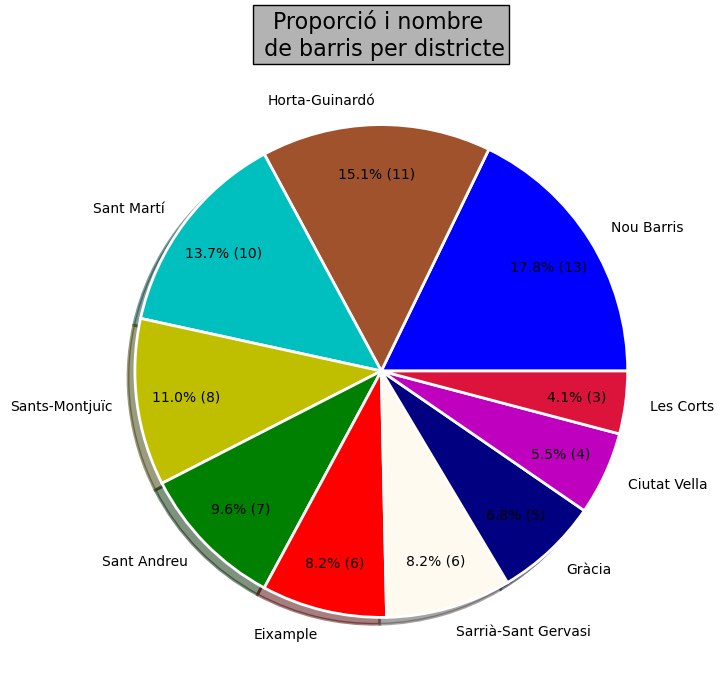

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

mycolors = ["b", "Sienna", "c", "y", "g", "r", "FloralWhite", "Navy" ,"m", "Crimson"]

plt.pie((rent_bcn_month['Nom_Districte'].value_counts()//4), labels = rent_bcn_month['Nom_Districte'].value_counts().index, 
        startangle = 0, counterclock=True, shadow = True, colors = mycolors, 
        autopct=lambda p: '{:.1f}% ({:.0f})'.format(p,(p/100)*(rent_bcn_month['Nom_Districte'].value_counts()//4).sum()), 
        pctdistance = 0.8, wedgeprops = {"linewidth": 2, "edgecolor": "white"})

# plt.legend(title = "Districtes", bbox_to_anchor =(1, 0, 0.5, 1))  # No posem llegenda pq ja hem posat labels
plt.title('Proporció i nombre \n de barris per districte', fontsize=16, bbox={'facecolor':'0.7', 'pad':3})

plt.savefig('barris_districtes.png')
plt.show()

Podem observar que els districtes amb més barris són Nou Barris, Horta-Guinardó i Sant Martí, i els que en tenen menos són Les Corts, Ciutat Vella i Gràcia. Es pot raonar que els districtes que més barris tenen tendeixen a estar més cap als afores de la ciutat, per la qual cosa han pogut creixer, i per tant han acabat tenint més barris.